In [45]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [2]:
train_dataset=pd.read_csv("/home/deepansh/TDS-AVENUE-CODEFORGE/archive/fraudTrain.csv")
test_dataset= pd.read_csv("/home/deepansh/TDS-AVENUE-CODEFORGE/archive/fraudTest.csv")

In [3]:
train_dataset.head()
test_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
normal= train_dataset[train_dataset["is_fraud"]==0]
fraud= train_dataset[train_dataset["is_fraud"]==1]

In [5]:
fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

EDA

In [7]:
from autoviz.AutoViz_Class import AutoViz_Class
av= AutoViz_Class()
filename= "/home/deepansh/TDS-AVENUE-CODEFORGE/archive/fraudTrain.csv"
dft= av.AutoViz(filename)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
    max_rows_analyzed is smaller than dataset shape 1296675...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 23)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Nu

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,3.000000,1296656.000000,Possible ID column: drop before modeling step.
trans_date_trans_time,object,0.000000,99,,,149704 rare categories: Too many to list. Group them into a single category or drop the categories.
cc_num,int64,0.000000,0,60416207185.000000,4992346398065154048.000000,Column has 13844 outliers greater than upper bound (11357453274321144.00) or lower than lower bound(-6526403250206846.00). Cap them or remove them.
merchant,object,0.000000,0,,,Possible high cardinality column with 693 unique values: Use hash encoding or text embedding to reduce dimension.
category,object,0.000000,0,,,No issue
amt,float64,0.000000,NA,1.000000,14238.110000,Column has 7736 outliers greater than upper bound (193.56) or lower than lower bound(-100.73). Cap them or remove them.
first,object,0.000000,0,,,Possible high cardinality column with 348 unique values: Use hash encoding or text embedding to reduce dimension.
last,object,0.000000,0,,,Possible high cardinality column with 476 unique values: Use hash encoding or text embedding to reduce dimension.
gender,object,0.000000,0,,,No issue
street,object,0.000000,0,,,Possible high cardinality column with 960 unique values: Use hash encoding or text embedding to reduce dimension.


Number of All Scatter Plots = 15


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Package movie_reviews is a

Could not draw wordcloud plot for dob. We need at least 1 word to plot a word cloud, got 0.
All Plots done
Time to run AutoViz = 228 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [8]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [9]:
train_dataset.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [10]:
train_dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
test_dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
train_dataset.drop(columns="Unnamed: 0")
test_dataset.drop(columns="Unnamed: 0")

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [13]:
encoder=LabelEncoder()
train_dataset["trans_date_trans_time"]= encoder.fit_transform(train_dataset["trans_date_trans_time"])
train_dataset["merchant"]= encoder.fit_transform(train_dataset["merchant"])
train_dataset["category"]= encoder.fit_transform(train_dataset["category"])
train_dataset["first"]= encoder.fit_transform(train_dataset["first"])
train_dataset["last"]= encoder.fit_transform(train_dataset["last"])
train_dataset["gender"]= encoder.fit_transform(train_dataset["gender"])
train_dataset["street"]= encoder.fit_transform(train_dataset["street"])
train_dataset["city"]= encoder.fit_transform(train_dataset["city"])
train_dataset["state"]= encoder.fit_transform(train_dataset["state"])
train_dataset["job"]= encoder.fit_transform(train_dataset["job"])
train_dataset["dob"]= encoder.fit_transform(train_dataset["dob"])
train_dataset["trans_num"]= encoder.fit_transform(train_dataset["trans_num"])

In [14]:
test_dataset["trans_date_trans_time"]= encoder.fit_transform(test_dataset["trans_date_trans_time"])
test_dataset["merchant"]= encoder.fit_transform(test_dataset["merchant"])
test_dataset["category"]= encoder.fit_transform(test_dataset["category"])
test_dataset["first"]= encoder.fit_transform(test_dataset["first"])
test_dataset["last"]= encoder.fit_transform(test_dataset["last"])
test_dataset["gender"]= encoder.fit_transform(test_dataset["gender"])
test_dataset["street"]= encoder.fit_transform(test_dataset["street"])
test_dataset["city"]= encoder.fit_transform(test_dataset["city"])
test_dataset["state"]= encoder.fit_transform(test_dataset["state"])
test_dataset["job"]= encoder.fit_transform(test_dataset["job"])
test_dataset["dob"]= encoder.fit_transform(test_dataset["dob"])
test_dataset["trans_num"]= encoder.fit_transform(test_dataset["trans_num"])

In [15]:
train_dataset.shape, test_dataset.shape

((1296675, 23), (555719, 23))

DATA SPLITTING


In [16]:
X_train= train_dataset.drop(columns="is_fraud")
y_train=train_dataset["is_fraud"]
x_test=test_dataset.drop(columns="is_fraud")
y_test=test_dataset["is_fraud"]

In [17]:
train_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2703186189652095,514,8,4.97,162,18,0,568,526,27,28654,36.0788,-81.1781,3495,370,779,56438,1325376018,36.011293,-82.048315,0
1,1,1,630423337322,241,4,107.23,309,157,0,435,612,47,99160,48.8878,-118.2105,149,428,607,159395,1325376044,49.159047,-118.186462,0
2,2,2,38859492057661,390,0,220.11,115,381,1,602,468,13,83252,42.1808,-112.2620,4154,307,302,818703,1325376051,43.150704,-112.154481,0
3,3,3,3534093764340240,360,2,45.00,163,463,1,930,84,26,59632,46.2306,-112.1138,1939,328,397,544575,1325376076,47.034331,-112.561071,0
4,4,4,375534208663984,297,9,41.96,336,149,1,418,216,45,24433,38.4207,-79.4629,99,116,734,831111,1325376186,38.674999,-78.632459,0


model fitting

In [18]:
model1=LogisticRegression()
model2=DecisionTreeClassifier()
model3= RandomForestClassifier()

Model 1----> Logistic Regression

In [22]:
model1.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred1= model1.predict(x_test)
cm1= confusion_matrix(y_test, y_pred1)
print("Confusion Matrix for Logistic Regression Model")
print(cm1)
regressor_score=accuracy_score(y_test, y_pred1)
print("Accuracy score for Logistic Regression Model")
print(regressor_score)
Regressor_report= classification_report(y_test, y_pred1)
print("Classification report for Logistic Regression Model")
print(Regressor_report)

Confusion Matrix for Logistic Regression Model
[[553574      0]
 [  2145      0]]
Accuracy score for Logistic Regression Model
0.9961401355721147
Classification report for Logistic Regression Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



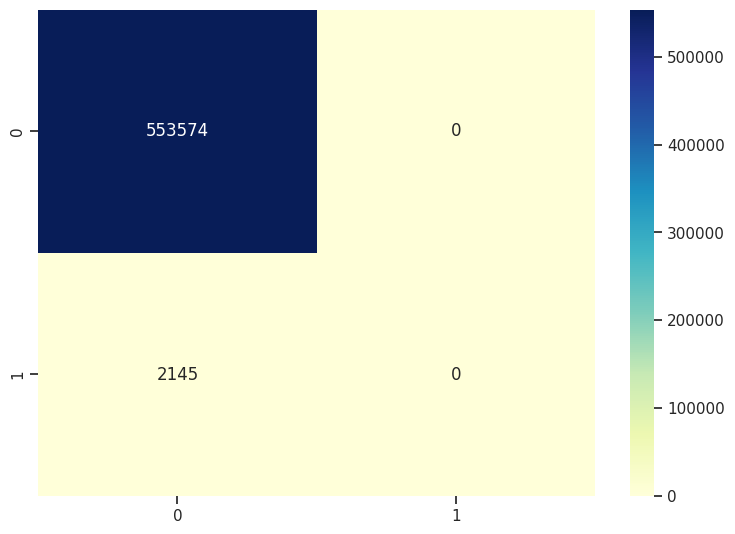

In [43]:
plt.figure(figsize=(8, 6))
heatmap1=sns.heatmap(data=cm1, annot=True ,fmt="d", cmap='YlGnBu')
plt.savefig("heatmap1.png")
plt.show()

Model 2--- Decision Tree

In [24]:
model2.fit(X_train, y_train)


DecisionTreeClassifier()

In [25]:
y_pred2= model2.predict(x_test)
cm2= confusion_matrix(y_test, y_pred2)
print("Confusion Matrix for Decision Tree Model")
print(cm2)
regressor_score2=accuracy_score(y_test, y_pred2)
print("Accuracy score for Decision Tree Model")
print(regressor_score2)
Regressor_report2= classification_report(y_test, y_pred2)
print("Classification report for Decision Tree Model")
print(Regressor_report2)

Confusion Matrix for Decision Tree Model
[[548427   5147]
 [   934   1211]]
Accuracy score for Decision Tree Model
0.9890574193072398
Classification report for Decision Tree Model
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.19      0.56      0.28      2145

    accuracy                           0.99    555719
   macro avg       0.59      0.78      0.64    555719
weighted avg       1.00      0.99      0.99    555719



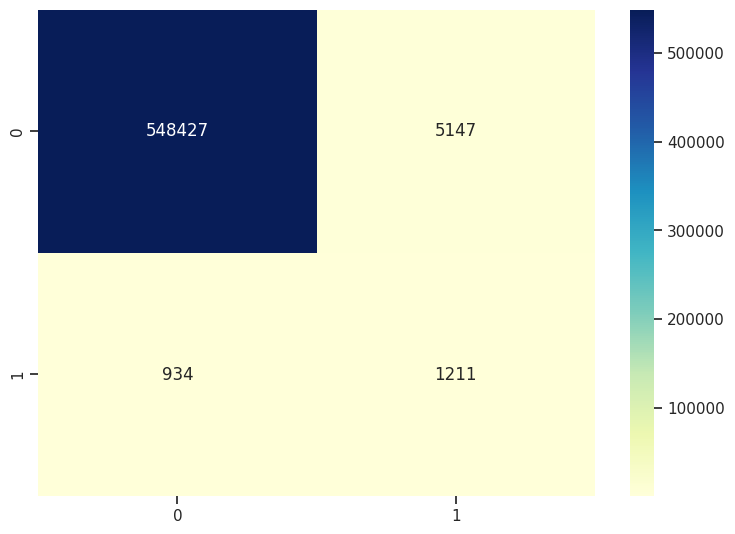

In [44]:
plt.figure(figsize=(8, 6))
heatmap2=sns.heatmap(data=cm2, annot=True ,fmt="d", cmap='YlGnBu')
plt.savefig("heatmap2.png")
plt.show()

Model3 -----> Random Forest

In [26]:
model3.fit(X_train, y_train)

RandomForestClassifier()

In [32]:

y_pred3= model3.predict(x_test)
cm3= confusion_matrix(y_test, y_pred3)
print("Confusion Matrix for Random Forest Model")
print(cm3)
regressor_score3=accuracy_score(y_test, y_pred3)
print("Accuracy score for Random Model")
print(regressor_score3)
Regressor_report3= classification_report(y_test, y_pred3)
print("Classification report for Random Forest Model")
print(Regressor_report3)

Confusion Matrix for Random Forest Model
[[553401    173]
 [  1249    896]]
Accuracy score for Random Model
0.9974411528128425
Classification report for Random Forest Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.84      0.42      0.56      2145

    accuracy                           1.00    555719
   macro avg       0.92      0.71      0.78    555719
weighted avg       1.00      1.00      1.00    555719



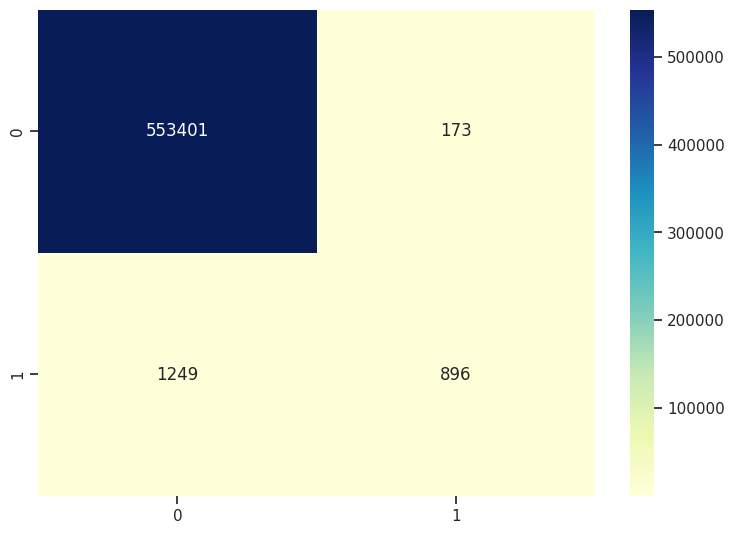

In [41]:
plt.figure(figsize=(8, 6))
heatmap3=sns.heatmap(data=cm3, annot=True ,fmt="d", cmap='YlGnBu')
plt.savefig("heatmap3.png")
plt.show()